In [13]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

In [19]:
df = pd.read_csv('klasifikasi-spam-sms/data/clean_data.csv')
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0    0
teks          0
label         0
dtype: int64

In [21]:
X = df.teks
y = df.label

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((913,), (229,), (913,), (229,))

In [22]:
tf = TfidfVectorizer()
tf.fit(X_train)
X_trainTF = tf.transform(X_train)
X_testTF = tf.transform(X_test)

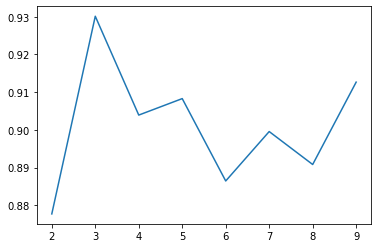

In [30]:
acc = []
for i in range(2,10):    
    mkn = KNeighborsClassifier(n_neighbors=i)
    mkn.fit(X_trainTF,y_train)
    a = mkn.score(X_testTF,y_test)
    acc.append(a)
plt.plot(range(2,10),acc)

In [44]:
cv = CountVectorizer().fit(X)
X_cv = cv.transform(X)

#scaled 
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_cv.toarray())


In [46]:
X_train,X_test,y_train,y_test= train_test_split(X_cv,y,random_state=0,test_size=0.2)

In [49]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
mkn = KNeighborsClassifier()
mkn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
acc = mkn.score(X_test,y_test)
acc

0.7117903930131004